In [3]:
import nltk

In [4]:
nltk.download_shell()
#d for download
#stopwords
#q

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------

Download which package (l=list; x=cancel)?
        Vostro\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


In [5]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [6]:
len(messages)

5574

In [15]:
for index, message in enumerate(messages[:10]):
    print(index, message)
    print('*' * 100)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
****************************************************************************************************
1 ham	Ok lar... Joking wif u oni...
****************************************************************************************************
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
****************************************************************************************************
3 ham	U dun say so early hor... U c already then say...
****************************************************************************************************
4 ham	Nah I don't think he goes to usf, he lives around here though
****************************************************************************************************
5 spam	FreeMsg Hey there darling it's been 3 week's no

In [16]:
import pandas as pd

In [19]:
messages_df = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names = ['label','messages'])

In [20]:
messages_df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
messages_df.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [27]:
messages_df.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [57]:
messages_df['length'] = messages_df['messages'].apply(len)

In [58]:
messages_df.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


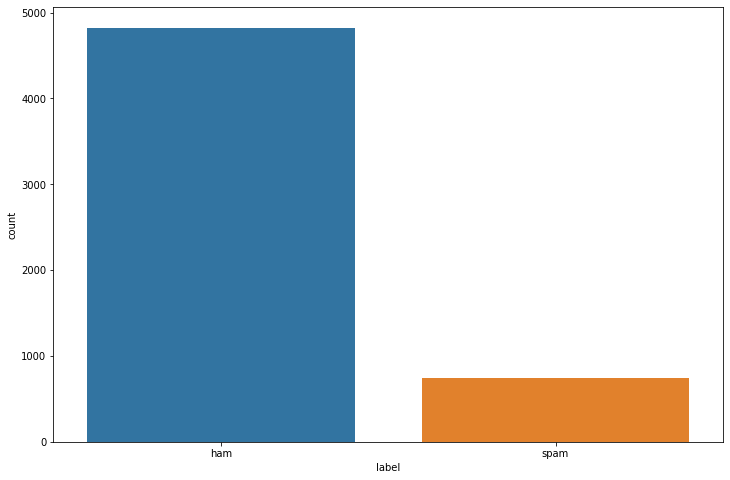

In [60]:
import seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(12,8)

sns.countplot(messages_df['label'])


([<matplotlib.patches.Wedge at 0x28f9c11bb48>,
 [Text(1.095132566451434, 0.49059623102659045, 'Spam'),
  Text(-1.0038715402997416, -0.4497131647797566, 'Ham')])

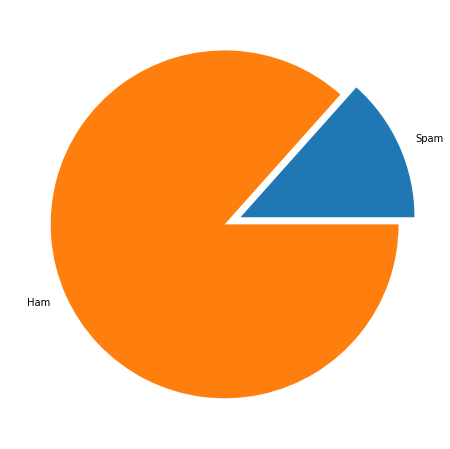

In [83]:
spamlen = len( messages_df[messages_df['label']=='spam'])
hamlen = len( messages_df[messages_df['label']=='ham'])

Labels = ['Spam', 'Ham']
explode = (0.1, 0)
sizes = [spamlen, hamlen]

plt.pie(sizes, labels=Labels, explode=explode)

In [85]:
import plotly.express as px

In [88]:
px.histogram(messages_df, x=messages_df['length'])

In [89]:
messages_df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [96]:
messages_df[messages_df['length']== 910]

,label,messages,length
1085,ham,For me the love should start with attraction.i...,910


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F9F2B4B08>,
      dtype=object)

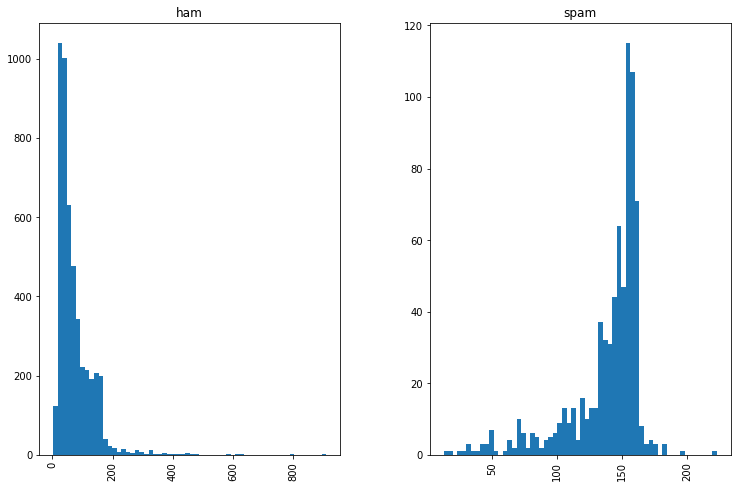

In [97]:
messages_df.hist(column = 'length', by='label', bins=60)

In [98]:
#Bag of words

In [99]:
import string

In [100]:
mess = 'Sample Message ! notice : it has punctuation.'

In [106]:
#Example 

noPunc = [c for c in mess if c not in string.punctuation]
print(*noPunc)

S a m p l e   M e s s a g e     n o t i c e     i t   h a s   p u n c t u a t i o n


In [107]:
# Remove Stop Words

In [108]:
from nltk.corpus import stopwords

In [113]:
# Stop Words do not tell you any distinguishing features
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [114]:
noPunc = ''.join(noPunc)

In [115]:
noPunc

'Sample Message  notice  it has punctuation'

In [119]:
clean_mess = [word for word in noPunc.split() if word.lower() not in stopwords.words('english')]

In [120]:
clean_mess

['Sample', 'Message', 'notice', 'punctuation']

In [135]:
def text_process(mess):
    """
    1. Remove punc
    2. Remove Stop Words
    3. Return list of clean words 
    """
    noPunc = [char for char in mess if char not in string.punctuation]
    noPunc = ''.join(noPunc)
    return [word for word in noPunc.split() if word.lower() not in stopwords.words('english')]

In [136]:
messages_df.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [137]:
# Tokenize:
messages_df['messages'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [138]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer

In [139]:
#bag of words
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages_df['messages'])

In [140]:
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x0000028FA0BB5F78>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [141]:
print(len(bow_transformer.vocabulary_))

11425


In [146]:
# For message 4 only
mess4 = messages_df['messages'][3]
mess4

'U dun say so early hor... U c already then say...'

In [171]:
bow4 = bow_transformer.transform([mess4])
print(bow4)
print(bow4.shape)
bow_transformer.get_feature_names()[9554]

(0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


'say'

In [155]:
# For whole words
messages_bow = bow_transformer.transform(messages_df['messages'])

In [156]:
print('shape of Sparse Mat.', messages_bow.shape)

shape of Sparse Mat. (5572, 11425)


In [158]:
#Non Zeros Occurances
messages_bow.nnz 

50548

In [159]:
from sklearn.feature_extraction.text import TfidfTransformer

In [161]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [162]:
tfidf4 = tfidf_transformer.transform(bow4)

In [163]:
print(tfidf4)

(0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [168]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['school']]

6.406812962701336

In [169]:
#For whole message
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [170]:
from sklearn.naive_bayes import MultinomialNB

In [173]:
spamModel = MultinomialNB().fit(messages_tfidf, messages_df['label'])

In [175]:
spamModel.predict(tfidf4)[0]

'ham'

In [176]:
messages_df['label'][3]

'ham'

In [177]:
pred = spamModel.predict(messages_tfidf)

In [178]:
pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
msg_train, msg_test, lbl_train, lbl_test = train_test_split(
                    messages_df['messages'],
                    messages_df['label'],
                    test_size=0.3)

In [181]:
msg_train

1495    It has everything to do with the weather. Keep...
4660    I cant pick the phone right now. Pls send a me...
1093                                  Where r we meeting?
2107                     Thank you. I like you as well...
850     Today's Offer! Claim ur £150 worth of discount...
                              ...                        
3988    Ringtone Club: Gr8 new polys direct to your mo...
3788                          WHORE YOU ARE UNBELIEVABLE.
821     Good afternoon starshine! How's my boytoy? Doe...
743     Just got up. have to be out of the room very s...
4133    Hi baby ive just got back from work and i was ...
Name: messages, Length: 3900, dtype: object

In [182]:
from sklearn.pipeline import Pipeline

In [184]:
pipeline = Pipeline([
        ('bow',CountVectorizer(analyzer=text_process)),
        ('tfidf', TfidfTransformer()),
        ('classifier',MultinomialNB())    
      ])

In [185]:
pipeline.fit(msg_train, lbl_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000028FA0BB5F78>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [186]:
predictions = pipeline.predict(msg_test)

In [187]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [191]:
from sklearn.metrics import classification_report, confusion_matrix

In [189]:
print(classification_report(lbl_test, predictions))

precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1451
        spam       1.00      0.72      0.84       221

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [192]:
print(confusion_matrix(lbl_test, predictions))

[[1451    0]
 [  61  160]]


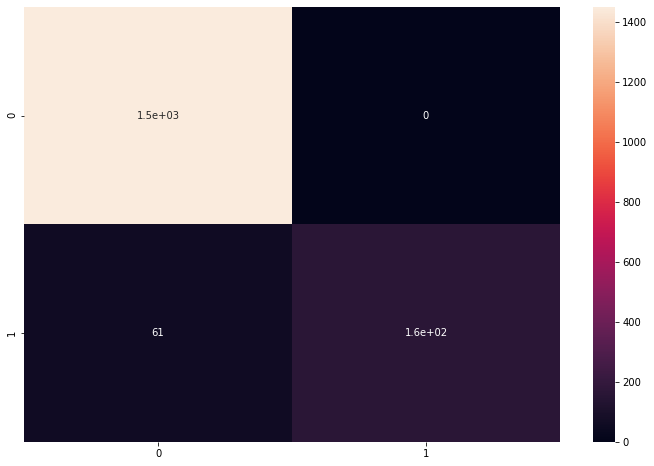

In [193]:
sns.heatmap(confusion_matrix(lbl_test, predictions), annot=True)